# Simulation and parameter recovery of dynamic foraging task.

In [ ]:
pip install -e /root/capsule

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
from aind_behavior_gym.dynamic_foraging.task import CoupledBlockTask, UncoupledBlockTask
from aind_dynamic_foraging_models.generative_model import ForagerCollection

## Get all foragers

In [2]:
from aind_dynamic_foraging_models.generative_model.foragers import ForagerCollection


forager_collection: ForagerCollection = ForagerCollection()
df = forager_collection.get_all_foragers()
df.columns

Index(['agent_class_name', 'agent_kwargs', 'agent_alias',
       'number_of_learning_rate', 'number_of_forget_rate', 'choice_kernel',
       'action_selection', 'preset_name', 'n_free_params', 'params', 'forager',
       'win_stay_lose_switch', 'reset_to_threshold'],
      dtype='object')

In [3]:
df

agent_class_name  \
0          ForagerQLearning   
1          ForagerQLearning   
2          ForagerQLearning   
3          ForagerQLearning   
4          ForagerQLearning   
5          ForagerQLearning   
6          ForagerQLearning   
7          ForagerQLearning   
8          ForagerQLearning   
9          ForagerQLearning   
10         ForagerQLearning   
11         ForagerQLearning   
12         ForagerQLearning   
13         ForagerQLearning   
14         ForagerQLearning   
15         ForagerQLearning   
16         ForagerQLearning   
17         ForagerQLearning   
18         ForagerQLearning   
19         ForagerQLearning   
20         ForagerQLearning   
21         ForagerQLearning   
22         ForagerQLearning   
23         ForagerQLearning   
24      ForagerLossCounting   
25      ForagerLossCounting   
26      ForagerLossCounting   
27      ForagerLossCounting   
28      ForagerLossCounting   
29      ForagerLossCounting   
30  ForagerCompareThreshold   
31  ForagerCompareThreshold   
32  ForagerCompareThreshold   
33  ForagerCompareThreshold   
34  ForagerCompareThreshold   
35  ForagerCompareThreshold   
36  ForagerCompareThreshold   
37  ForagerCompareThreshold   
38  ForagerCompareThreshold   
39  ForagerCompareThreshold   
40  ForagerCompareThreshold   
41  ForagerCompareThreshold   

                                         agent_kwargs  \
0   {'number_of_learning_rate': 1, 'number_of_forg...   
1   {'number_of_learning_rate': 1, 'number_of_forg...   
2   {'number_of_learning_rate': 1, 'number_of_forg...   
3   {'number_of_learning_rate': 1, 'number_of_forg...   
4   {'number_of_learning_rate': 1, 'number_of_forg...   
5   {'number_of_learning_rate': 1, 'number_of_forg...   
6   {'number_of_learning_rate': 1, 'number_of_forg...   
7   {'number_of_learning_rate': 1, 'number_of_forg...   
8   {'number_of_learning_rate': 1, 'number_of_forg...   
9   {'number_of_learning_rate': 1, 'number_of_forg...   
10  {'number_of_learning_rate': 1, 'number_of_forg...   
11  {'number_of_learning_rate': 1, 'number_of_forg...   
12  {'number_of_learning_rate': 2, 'number_of_forg...   
13  {'number_of_learning_rate': 2, 'number_of_forg...   
14  {'number_of_learning_rate': 2, 'number_of_forg...   
15  {'number_of_learning_rate': 2, 'number_of_forg...   
16  {'number_of_learning_rate': 2, 'number_of_forg...   
17  {'number_of_learning_rate': 2, 'number_of_forg...   
18  {'number_of_learning_rate': 2, 'number_of_forg...   
19  {'number_of_learning_rate': 2, 'number_of_forg...   
20  {'number_of_learning_rate': 2, 'number_of_forg...   
21  {'number_of_learning_rate': 2, 'number_of_forg...   
22  {'number_of_learning_rate': 2, 'number_of_forg...   
23  {'number_of_learning_rate': 2, 'number_of_forg...   
24  {'win_stay_lose_switch': False, 'choice_kernel...   
25  {'win_stay_lose_switch': False, 'choice_kernel...   
26  {'win_stay_lose_switch': False, 'choice_kernel...   
27  {'win_stay_lose_switch': True, 'choice_kernel'...   
28  {'win_stay_lose_switch': True, 'choice_kernel'...   
29  {'win_stay_lose_switch': True, 'choice_kernel'...   
30  {'number_of_learning_rate': 1, 'choice_kernel'...   
31  {'number_of_learning_rate': 1, 'choice_kernel'...   
32  {'number_of_learning_rate': 1, 'choice_kernel'...   
33  {'number_of_learning_rate': 1, 'choice_kernel'...   
34  {'number_of_learning_rate': 1, 'choice_kernel'...   
35  {'number_of_learning_rate': 1, 'choice_kernel'...   
36  {'number_of_learning_rate': 2, 'choice_kernel'...   
37  {'number_of_learning_rate': 2, 'choice_kernel'...   
38  {'number_of_learning_rate': 2, 'choice_kernel'...   
39  {'number_of_learning_rate': 2, 'choice_kernel'...   
40  {'number_of_learning_rate': 2, 'choice_kernel'...   
41  {'number_of_learning_rate': 2, 'choice_kernel'...   

                                   agent_alias  number_of_learning_rate  \
0                       QLearning_L1F0_softmax                      1.0   
1                          QLearning_L1F0_epsi                      1.0   


## Parameter Recovery

=== Ground-truth generator ===
agent_alias: ForagingCompareThreshold_L2_NoReset
agent_kwargs: {'number_of_learning_rate': 2, 'choice_kernel': 'none', 'reset_to_threshold': False}
params_list_free: ['biasL', 'softmax_inverse_temperature', 'threshold', 'learn_rate_unrew', 'learn_rate_rew']
params: {'learn_rate_rew': 0.32, 'learn_rate_unrew': 0.24, 'threshold': 0.6, 'softmax_inverse_temperature': 10.0, 'biasL': 3.0}


2026-02-20 07:08:36,075 - aind_dynamic_foraging_models.generative_model.base - INFO - Fitting the model using the whole dataset...



Fitting variant: L1 | reset_to_threshold=True
differential_evolution step 1: f(x)= 350.2252334881623
differential_evolution step 2: f(x)= 350.2252334881623
differential_evolution step 3: f(x)= 350.2252334881623
differential_evolution step 4: f(x)= 327.68726097780757
differential_evolution step 5: f(x)= 320.3711506858341
differential_evolution step 6: f(x)= 310.17200120476014
differential_evolution step 7: f(x)= 299.9111664603471
differential_evolution step 8: f(x)= 299.9111664603471
differential_evolution step 9: f(x)= 299.9111664603471
differential_evolution step 10: f(x)= 299.9111664603471
differential_evolution step 11: f(x)= 299.9111664603471
differential_evolution step 12: f(x)= 299.9111664603471
differential_evolution step 13: f(x)= 299.9111664603471
differential_evolution step 14: f(x)= 298.94439412414874
differential_evolution step 15: f(x)= 297.0380160524803
differential_evolution step 16: f(x)= 297.0380160524803
differential_evolution step 17: f(x)= 297.0380160524803
differe

2026-02-20 07:08:47,611 - aind_dynamic_foraging_models.generative_model.base - INFO - Fitting the model using the whole dataset...



Fitting variant: L1 | reset_to_threshold=False
differential_evolution step 1: f(x)= 334.89770931044075
differential_evolution step 2: f(x)= 334.89770931044075
differential_evolution step 3: f(x)= 334.89770931044075
differential_evolution step 4: f(x)= 318.9984099178489
differential_evolution step 5: f(x)= 251.63220826015208
differential_evolution step 6: f(x)= 244.64000236835503
differential_evolution step 7: f(x)= 244.64000236835503
differential_evolution step 8: f(x)= 244.64000236835503
differential_evolution step 9: f(x)= 244.64000236835503
differential_evolution step 10: f(x)= 243.38440390538068
differential_evolution step 11: f(x)= 242.6587783336217
differential_evolution step 12: f(x)= 242.13995570113696
differential_evolution step 13: f(x)= 240.8439130323478
differential_evolution step 14: f(x)= 239.91073924508396
differential_evolution step 15: f(x)= 238.28192441388148
differential_evolution step 16: f(x)= 238.28192441388148
differential_evolution step 17: f(x)= 237.6163800597

2026-02-20 07:08:57,298 - aind_dynamic_foraging_models.generative_model.base - INFO - Fitting the model using the whole dataset...



Fitting variant: L2 | reset_to_threshold=True
differential_evolution step 1: f(x)= 388.46418792830974
differential_evolution step 2: f(x)= 331.240142354931
differential_evolution step 3: f(x)= 331.240142354931
differential_evolution step 4: f(x)= 331.240142354931
differential_evolution step 5: f(x)= 321.43396623645145
differential_evolution step 6: f(x)= 321.37828997170203
differential_evolution step 7: f(x)= 321.37828997170203
differential_evolution step 8: f(x)= 308.619828490868
differential_evolution step 9: f(x)= 308.619828490868
differential_evolution step 10: f(x)= 308.619828490868
differential_evolution step 11: f(x)= 308.619828490868
differential_evolution step 12: f(x)= 302.15582203853876
differential_evolution step 13: f(x)= 302.15582203853876
differential_evolution step 14: f(x)= 302.15582203853876
differential_evolution step 15: f(x)= 302.15582203853876
differential_evolution step 16: f(x)= 302.15582203853876
differential_evolution step 17: f(x)= 298.30725418839336
differe

2026-02-20 07:09:13,447 - aind_dynamic_foraging_models.generative_model.base - INFO - Fitting the model using the whole dataset...



Fitting variant: L2 | reset_to_threshold=False
differential_evolution step 1: f(x)= 320.1697932644435
differential_evolution step 2: f(x)= 269.41239033972835
differential_evolution step 3: f(x)= 251.76724017078112
differential_evolution step 4: f(x)= 251.76724017078112
differential_evolution step 5: f(x)= 251.76724017078112
differential_evolution step 6: f(x)= 251.76724017078112
differential_evolution step 7: f(x)= 247.6766622418924
differential_evolution step 8: f(x)= 238.692866704366
differential_evolution step 9: f(x)= 238.692866704366
differential_evolution step 10: f(x)= 238.692866704366
differential_evolution step 11: f(x)= 238.692866704366
differential_evolution step 12: f(x)= 238.692866704366
differential_evolution step 13: f(x)= 238.692866704366
differential_evolution step 14: f(x)= 238.1896609658561
differential_evolution step 15: f(x)= 238.1896609658561
differential_evolution step 16: f(x)= 238.1896609658561
differential_evolution step 17: f(x)= 238.1896609658561
differenti

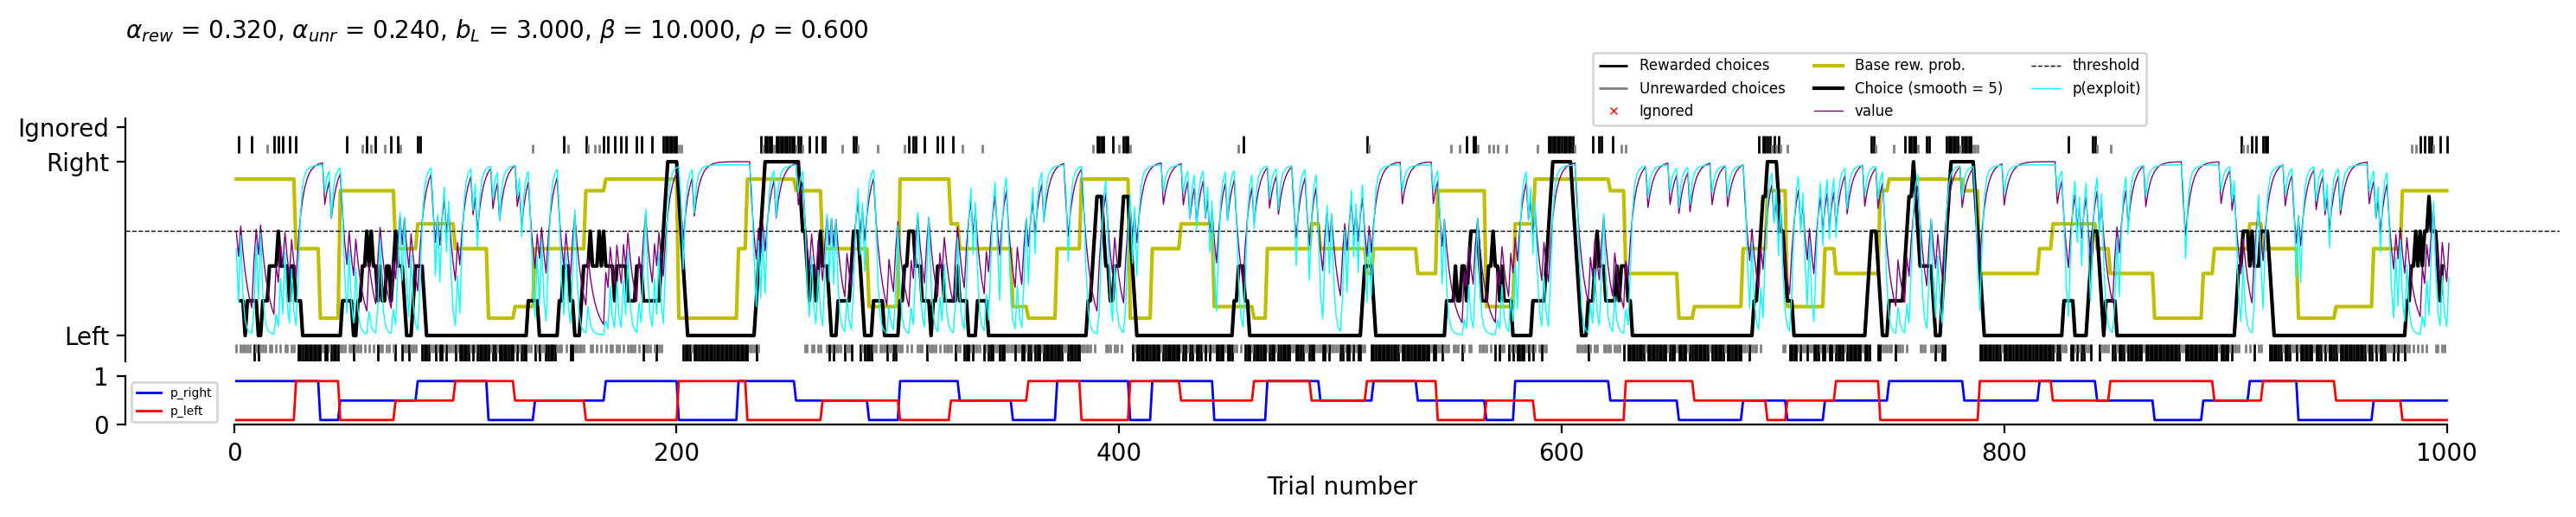

In [4]:
"""
Compare model-recovery across 4 variants of ForagerCompareThreshold:

1) L1 + Reset
2) L1 + NoReset
3) L2 + Reset
4) L2 + NoReset

We:
- Generate ONE synthetic dataset from a chosen "ground-truth" variant
- Fit all 4 variants to that same dataset
- Compare: LPT, prediction accuracy, fitted params vs ground truth (where comparable)

PLUS:
- Plot sessions for ALL fitted variants (and the generator) using plot_session(if_plot_latent=True)

IMPORTANT:
- reset_to_threshold and number_of_learning_rate are hyperparameters -> agent_kwargs (NOT set_params)
- For fitting, you must instantiate the fitting agent with matching agent_kwargs;
  otherwise the parameter list / bounds won't match the model structure.
"""

from __future__ import annotations

import numpy as np
import pandas as pd

from aind_behavior_gym.dynamic_foraging.task.uncoupled_block_task import UncoupledBlockTask
from aind_dynamic_foraging_models.generative_model.foragers import ForagerCollection


def _build_ctt_agent(
    *,
    number_of_learning_rate: int,
    reset_to_threshold: bool,
    choice_kernel: str = "none",
    seed: int = 42,
):
    """Build a CompareToThreshold agent with explicit agent_kwargs (hyperparameters)."""
    fc = ForagerCollection()
    preset = fc.FORAGER_PRESETS["CompareToThreshold"]
    agent_class_name = preset["agent_class"]

    agent_kwargs = dict(preset["agent_kwargs"])  # copy
    agent_kwargs.update(
        dict(
            number_of_learning_rate=number_of_learning_rate,
            reset_to_threshold=reset_to_threshold,
            choice_kernel=choice_kernel,
        )
    )
    agent = fc.get_forager(agent_class_name, agent_kwargs=agent_kwargs, seed=seed)
    return agent


def _set_ground_truth_params(
    agent,
    *,
    threshold=0.2,
    beta=10.0,
    biasL=3.0,
    lr_rew=0.32,
    lr_unrew=0.24,
    lr=0.28,
):
    """Set params depending on L1 vs L2 structure."""
    n_lr = int(agent.agent_kwargs.get("number_of_learning_rate", 1))
    if n_lr == 1:
        agent.set_params(
            threshold=float(threshold),
            learn_rate=float(lr),
            softmax_inverse_temperature=float(beta),
            biasL=float(biasL),
        )
    elif n_lr == 2:
        agent.set_params(
            threshold=float(threshold),
            learn_rate_rew=float(lr_rew),
            learn_rate_unrew=float(lr_unrew),
            softmax_inverse_temperature=float(beta),
            biasL=float(biasL),
        )
    else:
        raise ValueError(f"number_of_learning_rate must be 1 or 2, got {n_lr}")


def _fit_agent_on_data(
    *,
    number_of_learning_rate: int,
    reset_to_threshold: bool,
    choice_history,
    reward_history,
    seed: int = 42,
    workers: int = 4,
):
    """Fit one variant to the same dataset and return summary dict + fitted agent."""
    agent = _build_ctt_agent(
        number_of_learning_rate=number_of_learning_rate,
        reset_to_threshold=reset_to_threshold,
        seed=seed,
    )

    agent.fit(
        choice_history,
        reward_history,
        clamp_params={},
        DE_kwargs=dict(
            workers=workers,
            disp=True,
            seed=np.random.default_rng(seed),
        ),
        k_fold_cross_validation=None,
    )

    fr = agent.fitting_result
    fit_names = fr.fit_settings["fit_names"]
    fitted = dict(zip(fit_names, fr.x))

    return dict(
        number_of_learning_rate=number_of_learning_rate,
        reset_to_threshold=reset_to_threshold,
        agent_alias=agent.get_agent_alias(),
        fit_names=fit_names,
        fitted_params=fitted,
        LPT=float(fr.LPT),
        prediction_accuracy=float(fr.prediction_accuracy),
        agent=agent,  # <-- keep the fitted agent so we can plot_session()
    )


def _run_agent_on_observed_history(agent, choice_history, reward_history):
    """
    Run the agent forward on the *observed* (choice, reward) history to populate
    latent variables for plotting.

    Assumes the base class supports stepping through data via perform(...),
    but since we already have histories, we use the agent's fit/predict pipeline if available.

    Fallback:
    - If your base class provides something like agent.run_on_history(...) use that instead.
    - Otherwise, we use `agent.predict(choice_history, reward_history)` if it exists.
    """
    if hasattr(agent, "predict"):
        agent.predict(choice_history, reward_history)
        return

    # If there is no predict(), we try a light fallback by manually setting histories.
    # Many codebases store them during fit; in that case this is a no-op.
    if hasattr(agent, "choice_history"):
        agent.choice_history = np.asarray(choice_history, dtype=int)
    if hasattr(agent, "reward_history"):
        agent.reward_history = np.asarray(reward_history, dtype=float)

    # If plot_session relies on internal computed arrays (choice_prob/value/etc),
    # and these aren't filled by fit(), you'll need a real replay method in the base class.
    # In that case, replace this with the correct call in your codebase.


# =============================================================================
# 1) Generate ONE synthetic dataset from a chosen ground-truth variant
# =============================================================================

# Pick your ground-truth generating model here:
GT_number_of_learning_rate = 2     # 1 or 2
GT_reset_to_threshold = False      # True or False

task = UncoupledBlockTask(reward_baiting=False, num_trials=1000, seed=53)

forager_gen = _build_ctt_agent(
    number_of_learning_rate=GT_number_of_learning_rate,
    reset_to_threshold=GT_reset_to_threshold,
    seed=42,
)

# Set ground-truth params (choose values you want)
_set_ground_truth_params(
    forager_gen,
    threshold=0.6,
    beta=10.0,
    biasL=3.0,
    lr_rew=0.32,
    lr_unrew=0.24,
    lr=0.15,  # used only if GT is L1
)

print("=== Ground-truth generator ===")
print("agent_alias:", forager_gen.get_agent_alias())
print("agent_kwargs:", forager_gen.agent_kwargs)
print("params_list_free:", forager_gen.params_list_free)
print("params:", forager_gen.params.model_dump())

# Run generator
forager_gen.perform(task)
# Plot generator session
fig_gen, axes_gen = forager_gen.plot_session(if_plot_latent=True)



ground_truth_params = forager_gen.params.model_dump()

choice_history = forager_gen.get_choice_history()
reward_history = forager_gen.get_reward_history()



# =============================================================================
# 2) Fit all 4 variants to the SAME dataset
# =============================================================================

variants = [
    dict(number_of_learning_rate=1, reset_to_threshold=True),
    dict(number_of_learning_rate=1, reset_to_threshold=False),
    dict(number_of_learning_rate=2, reset_to_threshold=True),
    dict(number_of_learning_rate=2, reset_to_threshold=False),
]

results = []
for v in variants:
    print("\n" + "=" * 80)
    print(f"Fitting variant: L{v['number_of_learning_rate']} | reset_to_threshold={v['reset_to_threshold']}")
    out = _fit_agent_on_data(
        number_of_learning_rate=v["number_of_learning_rate"],
        reset_to_threshold=v["reset_to_threshold"],
        choice_history=choice_history,
        reward_history=reward_history,
        seed=42,
        workers=4,
    )
    results.append(out)





================ GROUND TRUTH ================

Ground-truth agent: ForagingCompareThreshold_L2_NoReset
Ground-truth params: {'learn_rate_rew': 0.32, 'learn_rate_unrew': 0.24, 'threshold': 0.6, 'softmax_inverse_temperature': 10.0, 'biasL': 3.0}



--------------------------------------------------------------------------------
Plotting fitted variant: ForagingCompareThreshold_L1

--------------------------------------------------------------------------------
Plotting fitted variant: ForagingCompareThreshold_L1_NoReset

--------------------------------------------------------------------------------
Plotting fitted variant: ForagingCompareThreshold_L2

--------------------------------------------------------------------------------
Plotting fitted variant: ForagingCompareThreshold_L2_NoReset


agent_alias  number_of_learning_rate  \
0                         GROUND_TRUTH                        2   
1  ForagingCompareThreshold_L2_NoReset                        2   
2  ForagingCompareThreshold_L1_NoReset                        1   
3          ForagingCompareThreshold_L2                        2   
4          ForagingCompareThreshold_L1                        1   

   reset_to_threshold       LPT  prediction_accuracy  Fit_biasL  \
0               False       NaN                  NaN   3.000000   
1               False  0.790195                0.890   3.206282   
2               False  0.789036                0.886   3.253529   
3                True  0.743223                0.852   2.141526   
4                True  0.743219                0.852   2.140078   

   Fit_learn_rate  Fit_learn_rate_rew  Fit_learn_rate_unrew  \
0             NaN            0.320000              0.240000   
1             NaN            0.326578              0.162109   
2        0.259348                 NaN                   NaN   
3             NaN            0.215560              0.227586   
4        0.220567                 NaN                   NaN   

   Fit_softmax_inverse_temperature  Fit_threshold  
0                        10.000000       0.600000  
1                        12.107492       0.695239  
2                        10.939258       0.531421  
3                         8.569635       0.515014  
4                         8.610406       0.527844

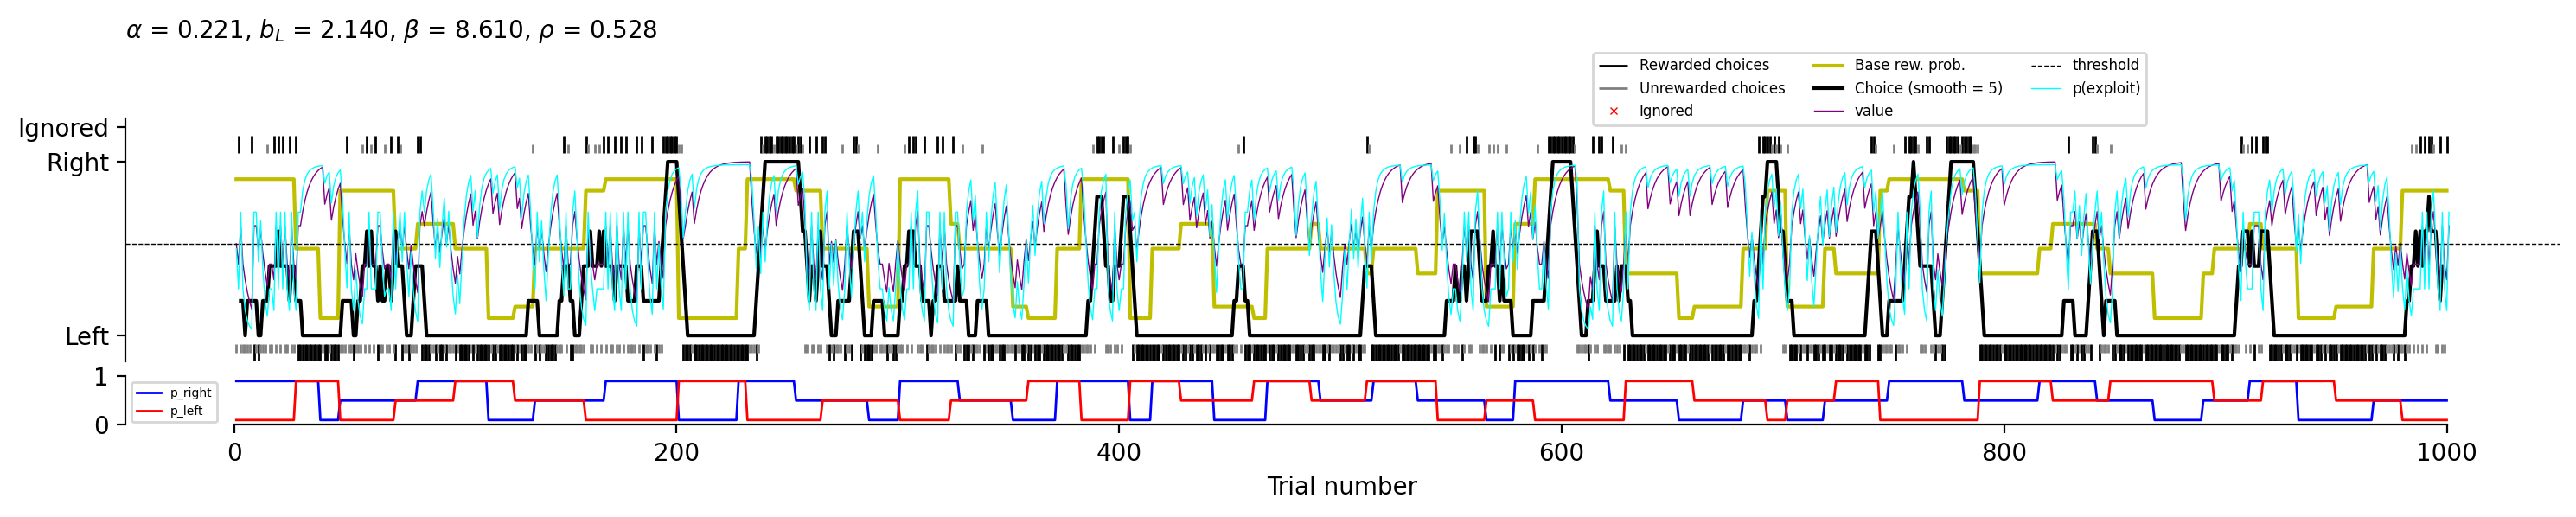

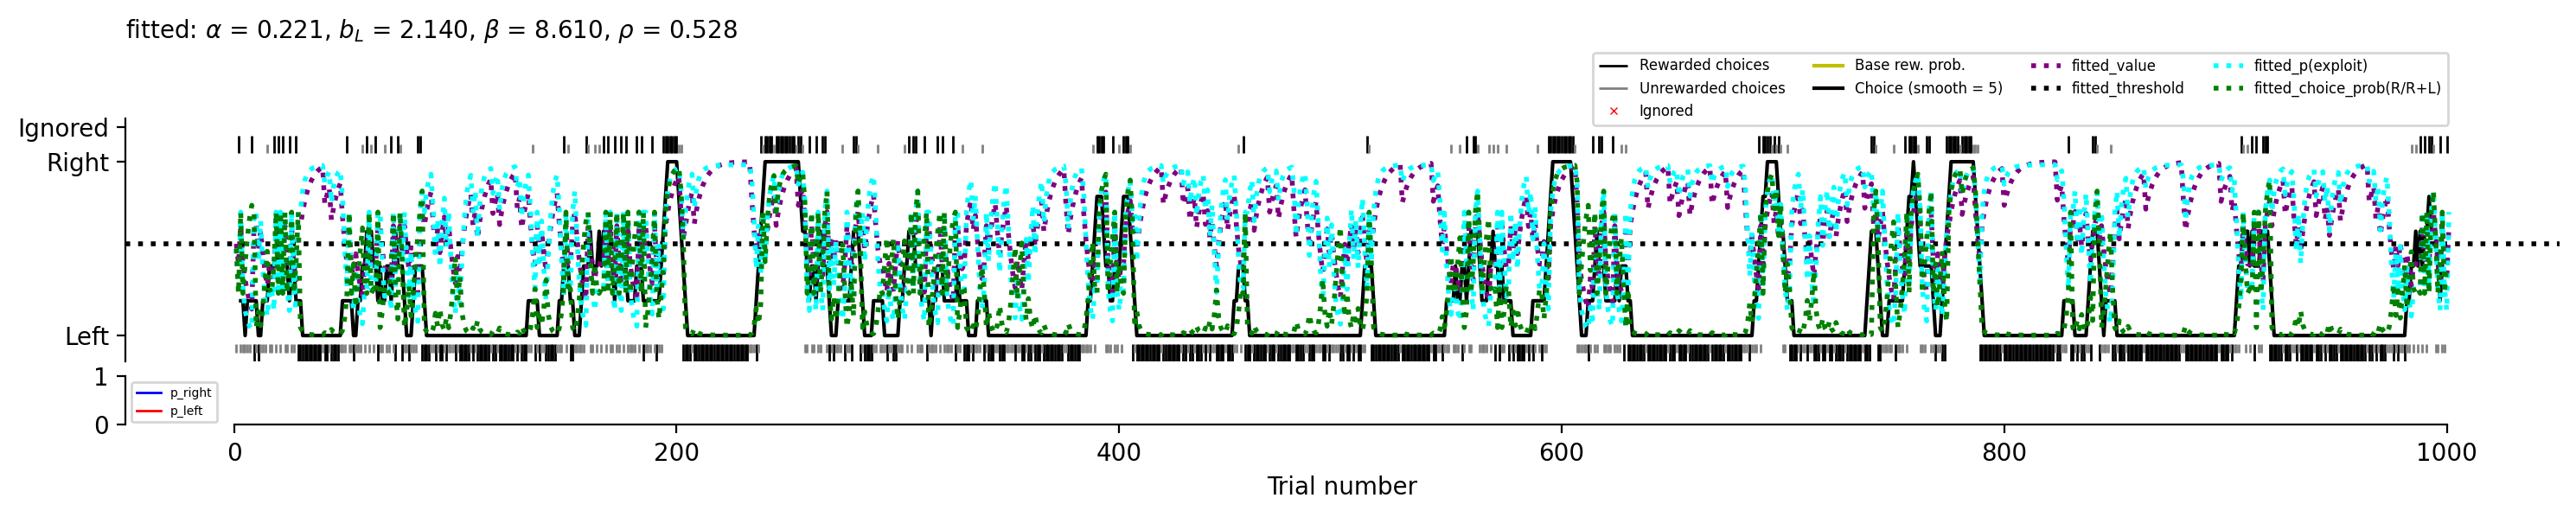

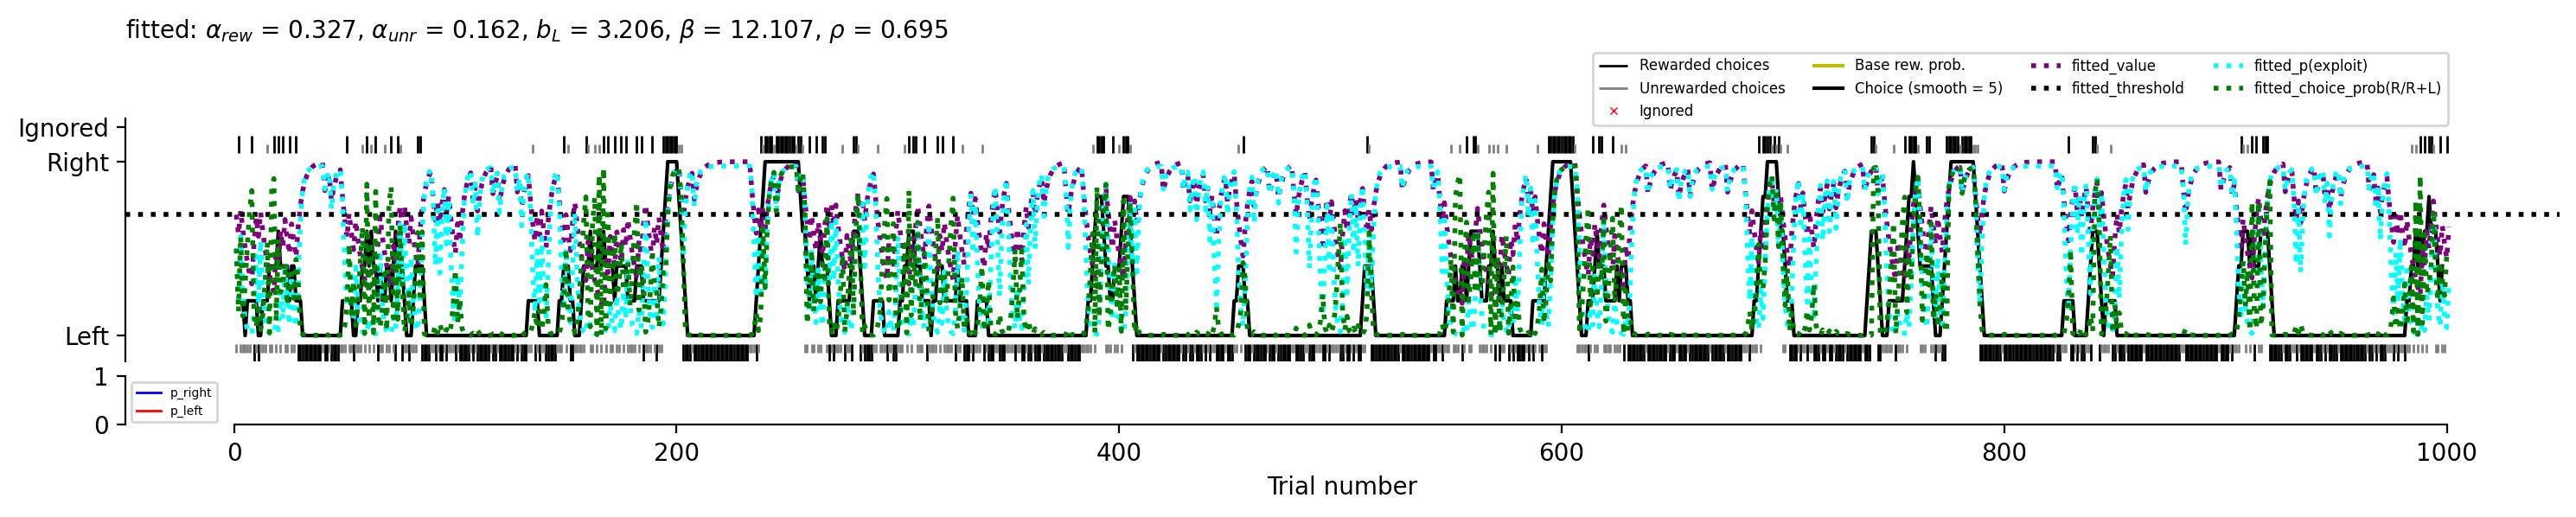

In [6]:
import numpy as np
import pandas as pd

# --------------------------------------------------
# 1️⃣ Print Ground Truth Once
# --------------------------------------------------
print("\n================ GROUND TRUTH ================\n")
print(f"Ground-truth agent: {forager_gen.get_agent_alias()}")
print(f"Ground-truth params: {ground_truth_params}")
print("\n")


# --------------------------------------------------
# 2️⃣ Plot sessions for ALL fitted variants
# --------------------------------------------------
task_for_plot = forager_gen.task

for r in results:
    agent = r["agent"]
    agent.task = task_for_plot

    print("\n" + "-" * 80)
    print(f"Plotting fitted variant: {r['agent_alias']}")
    fig_fit, axes_fit = agent.plot_session(if_plot_latent=True)

    fig_fitting, axes = agent.plot_fitted_session(if_plot_latent=True)
# --------------------------------------------------
# 3️⃣ Build Comparison DataFrame
# --------------------------------------------------
rows = []

# First collect all possible parameter names across models
all_param_names = set()
for r in results:
    fit_names = r["agent"].fitting_result.fit_settings["fit_names"]
    all_param_names.update(fit_names)

all_param_names = sorted(all_param_names)

# ---- Ground Truth Row ----
gt_row = {
    "agent_alias": "GROUND_TRUTH",
    "number_of_learning_rate": GT_number_of_learning_rate,
    "reset_to_threshold": GT_reset_to_threshold,
    "LPT": np.nan,
    "prediction_accuracy": np.nan,
}

for name in all_param_names:
    if name in ground_truth_params:
        gt_row[f"Fit_{name}"] = ground_truth_params[name]
    else:
        gt_row[f"Fit_{name}"] = np.nan

rows.append(gt_row)


# ---- Fitted Model Rows ----
for r in results:
    agent = r["agent"]
    fr = agent.fitting_result

    row = {
        "agent_alias": r["agent_alias"],
        "number_of_learning_rate": r["number_of_learning_rate"],
        "reset_to_threshold": r["reset_to_threshold"],
        "LPT": float(fr.LPT),
        "prediction_accuracy": float(fr.prediction_accuracy),
    }

    fit_names = fr.fit_settings["fit_names"]

    for name in all_param_names:
        if name in fit_names:
            idx = fit_names.index(name)
            row[f"Fit_{name}"] = float(fr.x[idx])
        else:
            row[f"Fit_{name}"] = np.nan

    rows.append(row)


comparison_df = (
    pd.DataFrame(rows)
    .sort_values("LPT", ascending=False, na_position="first")
    .reset_index(drop=True)
)

comparison_df
